In [21]:
import pandas as pd
import shap
import joblib

In [22]:
# Load the DataFrame
df_wk_path = '/Users/xparisot/Formation_OpenClassroom/Projets/Projet_7/datasets/df_wk.csv'
df_wk = pd.read_csv(df_wk_path)

# Chemin du fichier pour charger le modèle et les hyperparamètres
model_pipeline_path = '/Users/xparisot/Formation_OpenClassroom/Projets/Projet_7/models/model_pipeline_with_params.joblib'

# Charger le dictionnaire contenant le modèle et les hyperparamètres
loaded_pipe_clf_params = joblib.load(model_pipeline_path)

# Accéder au modèle, aux hyperparamètres et au score personnalisé à partir du dictionnaire chargé
loaded_model_pipeline = loaded_pipe_clf_params['pipeline']
loaded_hyperparameters = loaded_pipe_clf_params['hyperparameters']
loaded_score_train = loaded_pipe_clf_params['custom_score_train']

In [23]:
df_wk

,Nombre_d_enfants,Montant_annuite,AGE,Nombre_de_membres_dans_la_famille,Scoring_externe_2,Montant_total_du_credit,Nombre_de_versements,montant_du_versement,Montant_du_remboursement,Montant_du_crédit_precedent,...,Possede_un_vehicule,Possede_son_logement,Revenu_Non_salarie,Etudes_Superieures,Marie,Habite_en_appartement,Nom_du_contrat_precedent,Scoring_externe_1,Scoring_externe_3,SK_ID_CURR
0,0.0,24704.0,26.0,1.0,0.262939,40770.0,16.0,9250.0,9250.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.083008,0.139404,100002
1,0.0,35712.0,46.0,2.0,0.622070,22240.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.311279,0.000000,100003
2,0.0,6752.0,52.0,1.0,0.556152,0.0,2.0,5356.0,5356.0,20110.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.729492,100004
3,0.0,29680.0,52.0,2.0,0.650391,0.0,3.0,29020.0,29020.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,100006
4,0.0,21872.0,55.0,1.0,0.322754,0.0,4.0,1834.0,1834.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,100007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307503,0.0,27552.0,26.0,1.0,0.681641,0.0,6.0,6604.0,6604.0,40450.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.145630,0.000000,456251
307504,0.0,12000.0,57.0,1.0,0.115967,0.0,6.0,10050.0,10050.0,56830.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,456252
307505,0.0,29984.0,41.0,1.0,0.535645,0.0,4.0,3972.0,3972.0,27310.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.744141,0.218872,456253
307506,0.0,20208.0,33.0,2.0,0.514160,45000.0,7.0,19070.0,19070.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.000000,0.661133,456254


In [50]:
# 1. Sélection du client
selected_client = 100345

In [51]:
# 2. Préparation des données pour la prédiction
pred = df_wk.loc[df_wk['SK_ID_CURR'] == selected_client]

# Retirer l'ID client si le modèle a été entraîné sans cette feature
if 'SK_ID_CURR' in pred.columns:
    pred = pred.drop(['SK_ID_CURR'], axis=1)

In [52]:
# 3. Prédiction et probabilité
prediction = loaded_model_pipeline.predict(pred)
prediction_proba = loaded_model_pipeline.predict_proba(pred)

[LightGBM] [Warning] Unknown parameter: lgbmclassifier__learning_rate
[LightGBM] [Warning] Unknown parameter: lgbmclassifier__num_iterations
[LightGBM] [Warning] Unknown parameter: lgbmclassifier__max_depth
[LightGBM] [Warning] Unknown parameter: lgbmclassifier__min_data_in_leaf
[LightGBM] [Warning] Unknown parameter: lgbmclassifier__num_leaves
[LightGBM] [Warning] Unknown parameter: lgbmclassifier__learning_rate
[LightGBM] [Warning] Unknown parameter: lgbmclassifier__num_iterations
[LightGBM] [Warning] Unknown parameter: lgbmclassifier__max_depth
[LightGBM] [Warning] Unknown parameter: lgbmclassifier__min_data_in_leaf
[LightGBM] [Warning] Unknown parameter: lgbmclassifier__num_leaves


In [53]:
# 4. Décision et probabilité arrondie
decision = "accordé" if prediction[0] == 0 else "refusé"
probability = round(prediction_proba[0][0] * 100)

In [54]:
# 5. Affichage des résultats
print(f'La probabilité de remboursement est de : {probability} %')
print(f'La demande de crédit est : {decision}')

La probabilité de remboursement est de : 72 %
La demande de crédit est : accordé


In [55]:
# 6. Calculer les valeurs SHAP pour le client sélectionné
explainer = shap.Explainer(loaded_model_pipeline.named_steps['Classifier'])
shap_values_selected = explainer.shap_values(pred)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [56]:
# 7. Obtenir les valeurs des fonctionnalités pour le client sélectionné
feature_values = pd.DataFrame(pred.values, columns=pred.columns)

# Afficher le tableau des valeurs des fonctionnalités pour le client sélectionné
feature_values.T

,0
Nombre_d_enfants,0.000000
Montant_annuite,17088.000000
AGE,58.000000
Nombre_de_membres_dans_la_famille,2.000000
Scoring_externe_2,0.521484
Montant_total_du_credit,0.000000
Nombre_de_versements,9.000000
montant_du_versement,12584.000000
Montant_du_remboursement,12584.000000
Montant_du_crédit_precedent,0.000000


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


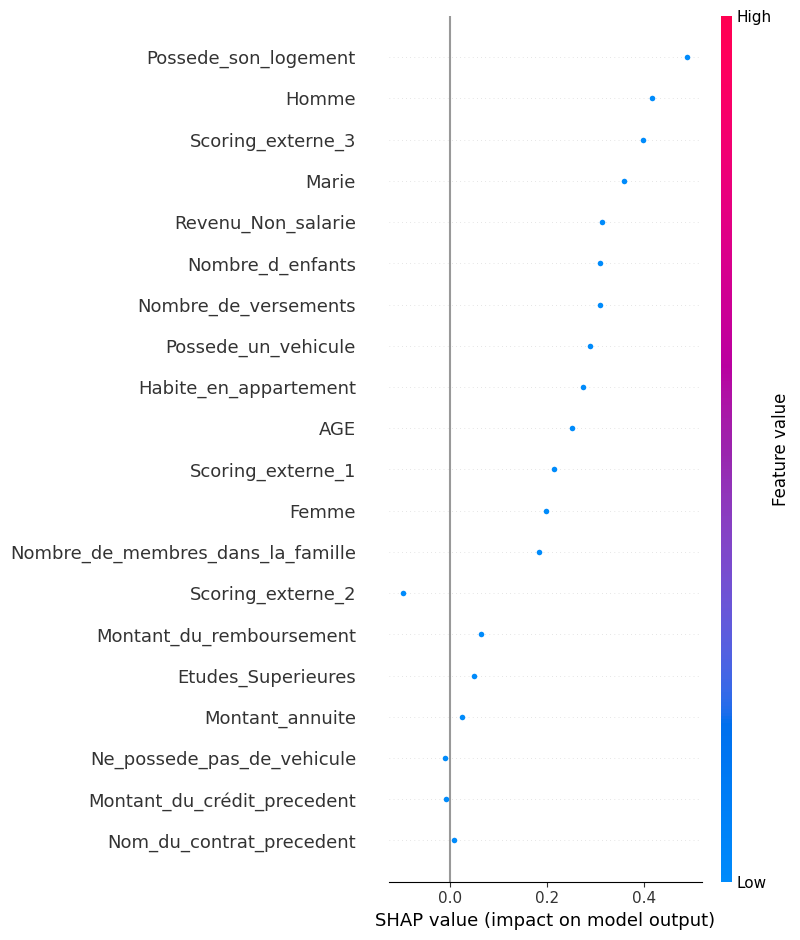

In [57]:
# 8. Visualiser l'importance des fonctionnalités pour le client sélectionné sous forme de graphique à barres
shap.summary_plot(shap_values_selected[0], feature_values)